In [1]:
# Importing libraries
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data into pandas dataframe
PATH = "CreditScoring.csv"
data = pd.read_csv(PATH)

In [3]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


## Data Cleaning and Preparation

In [4]:
# Renaming column names
data.columns = data.columns.str.lower().tolist()

In [5]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
# spcify the categorical variables
data.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [7]:
status_values = {
    1:"ok", 
    2:"default", 
    0:"unk"
}
data["status"] = data.status.map(status_values)

In [8]:
data.home.value_counts()

2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: home, dtype: int64

In [9]:
home_values = {
    1:"rent", 
    2:"owner", 
    3:"priv", 
    4:"ignore", 
    5:"parents", 
    0:"other"}
data['home'] = data.home.map(home_values)

In [10]:
data.marital.value_counts()

2    3241
1     978
4     130
3      67
5      38
0       1
Name: marital, dtype: int64

In [11]:
marital_values = {
    1:"single", 
    2:"married", 
    3:"widow", 
    4:"separated", 
    5:"divorced", 
    0:np.nan}
data['marital'] = data.marital.map(marital_values)

In [12]:
data.records.value_counts()

1    3682
2     773
Name: records, dtype: int64

In [13]:
records_values = {
    1:"no_rec", 
    2:"yes_rec"
}
data['records'] = data.records.map(records_values)

In [14]:
data.job.value_counts()

1    2806
3    1024
2     452
4     171
0       2
Name: job, dtype: int64

In [15]:
job_values = {
    1:"fixed", 
    2:"partime", 
    3:"freelance", 
    4:"other",
    0:np.nan}
data['job'] = data.job.map(job_values)

In [16]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [17]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [18]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()

In [19]:
# missing values in numeric data
(data[numeric_columns] == 0).sum()

seniority     535
time            0
age             0
expenses        0
income        347
assets       1627
debt         3670
amount          0
price           0
dtype: int64

In [20]:
(data[numeric_columns] == 99999999).sum()

seniority     0
time          0
age           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [21]:
# Replace the maximum values `99999999` and `0` with `nan` value
data['income'].replace({99999999:np.nan}, inplace=True)
data['assets'].replace({99999999:np.nan}, inplace=True)
data['debt'].replace({99999999:np.nan}, inplace=True)

In [22]:
# Replacing `nan` values in data with `0`.
data.isnull().sum()

status         0
seniority      0
home         319
time           0
age            0
marital        1
records        0
job            2
expenses       0
income        34
assets        47
debt          18
amount         0
price          0
dtype: int64

In [23]:
data.fillna(value=0, inplace=True)

In [24]:
df = data[(data['status'] == 'ok') | (data.status == 'default')]

## Split the data into training, validation and test data

In [25]:
# split the data with distribution in ratio 80:20:20 in training, validation and test datasets
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [26]:
def status_map(df):
    df['status'] = df.status.map({'ok':0, 'default':1})
    df.reset_index(drop=True, inplace=True)

# map 
status_map(df_train)
status_map(df_val)
status_map(df_test)

In [28]:
# Split the data into X and y
def split_data(df):
    
    X = df.drop(columns=['status'], axis=1)
    y = df['status']
    return  X, y

# train data
X_train, y_train = split_data(df_train)

# validation data
X_val, y_val = split_data(df_val)

# test data
X_test, y_test = split_data(df_test)

## Decision tree

In [29]:
# Importing decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import roc_auc_score

In [30]:
# Data transformation
dv = DictVectorizer(sparse=False)

# Training  data
train_dict = X_train.to_dict(orient='records')
X_train_transform = dv.fit_transform(train_dict)

val_dict = X_val.to_dict(orient='records')
X_val_transform = dv.transform(val_dict)

In [31]:
# Base model
clf = DecisionTreeClassifier(random_state=42)

# Fit model on training data.
clf.fit(X_train_transform, y_train)

y_preds = clf.predict_proba(X_val_transform)

In [32]:
# Training score
y_preds = clf.predict_proba(X_train_transform)[:, 1]
print("Training Score:: %.3f" % roc_auc_score(y_train, y_preds))


# Testing score
y_preds = clf.predict_proba(X_val_transform)[:, 1]
print("Validation Score:: %.3f" % roc_auc_score(y_val, y_preds))

Training Score:: 1.000
Validation Score:: 0.644


The above decision tree model overfits the data giving perfect accuracy score of 1 on training data while producing accuracy of 0.64 on validation data.

In [51]:
# Let's compute the accuracy of the decision tree using different values `max_depth` parameter. 
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, None]


training_scores = []
validation_scores = []
for depth in max_depths:

    # Model training
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_clf.fit(X_train_transform, y_train)

    # Training data
    y_preds = dt_clf.predict_proba(X_train_transform)[:, 1]
    training_scores.append(round(roc_auc_score(y_train, y_preds), 3))

    # Validation data
    y_preds = dt_clf.predict_proba(X_val_transform)[:, 1]
    validation_scores.append(round(roc_auc_score(y_val, y_preds), 3))

    del dt_clf

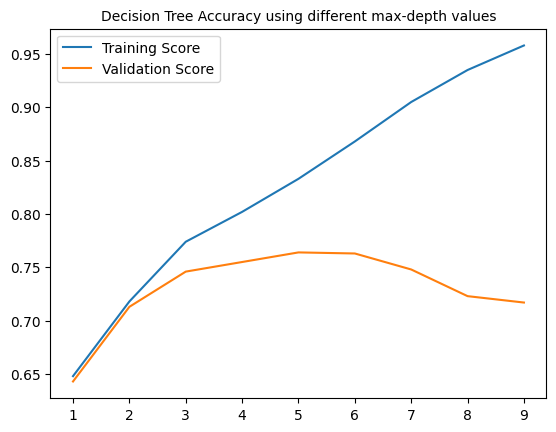

In [52]:
# Visualizing above performance
plt.plot(max_depths, training_scores, label="Training Score")
plt.plot(max_depths, validation_scores, label="Validation Score")

plt.title("Decision Tree Accuracy using different max-depth values", size=10)
plt.legend()
plt.show()

In [36]:
# max_depth == 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train_transform, y_train)
y_preds = clf.predict_proba(X_val_transform)

# accuracy score
y_preds = clf.predict_proba(X_train_transform)[:, 1]
print("Training Score:: %.3f" % roc_auc_score(y_train, y_preds))

y_preds = clf.predict_proba(X_val_transform)[:, 1]
print("Validaton Score:: %.3f" % roc_auc_score(y_val, y_preds))

Training Score:: 0.774
Validaton Score:: 0.746


In [37]:
print(export_text(clf, feature_names=dv.get_feature_names_out().tolist()))

|--- seniority <= 2.50
|   |--- records=yes_rec <= 0.50
|   |   |--- job=fixed <= 0.50
|   |   |   |--- class: 0
|   |   |--- job=fixed >  0.50
|   |   |   |--- class: 0
|   |--- records=yes_rec >  0.50
|   |   |--- income <= 136.50
|   |   |   |--- class: 1
|   |   |--- income >  136.50
|   |   |   |--- class: 1
|--- seniority >  2.50
|   |--- records=no_rec <= 0.50
|   |   |--- assets <= 3450.00
|   |   |   |--- class: 1
|   |   |--- assets >  3450.00
|   |   |   |--- class: 0
|   |--- records=no_rec >  0.50
|   |   |--- income <= 93.50
|   |   |   |--- class: 0
|   |   |--- income >  93.50
|   |   |   |--- class: 0



## Tunning a Hyperparameter
- max-depth
- min_samples_leafs

In [67]:
depths = [3, 4, 5, 6, 7]
samples = [1, 5, 10, 15, 20, 25, 30, 100, 200, 500, 1000]

scores = []
for depth in depths:
    for sample in samples:
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample, random_state=42)
        clf.fit(X_train_transform, y_train)

        y_pred = clf.predict(X_val_transform)
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((depth, sample, auc))
        del clf

score_df = pd.DataFrame(data=scores, 
                        columns=["max_depth", "min_samples_leaf", "Auc"])

In [68]:
score_df.sort_values(by=['Auc'], ascending=False).head()

,max_depth,min_samples_leaf,Auc
50,7,30,0.680677
39,6,30,0.678661
49,7,25,0.669762
48,7,20,0.668985
37,6,20,0.667314


In [69]:
# Creating a pivot table
score_pivot = score_df.pivot_table(index='min_samples_leaf', columns=['max_depth'], values='Auc')

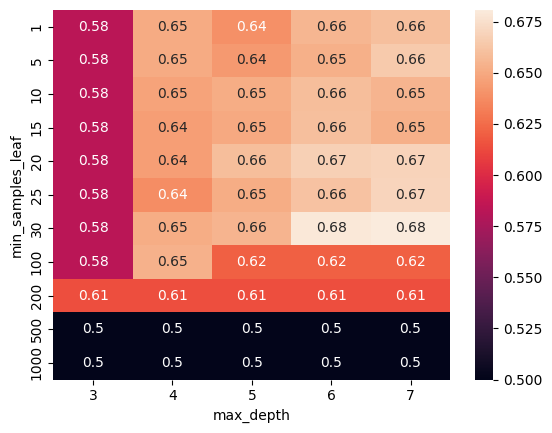

In [70]:
# Heatmap
sns.heatmap(score_pivot, annot=True)
plt.show()

In [72]:
# Highest score == 0.68, for max_depth=7, min_samples_leaf=30

dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=30, random_state=42)
dt_clf.fit(X_train_transform, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=30, random_state=42)